In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [4]:
import csv

In [8]:
df=pd.read_csv('weatherAUS.csv')


In [11]:
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [12]:
df.describe()



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,10651.000000,10660.000000,10570.000000,4258.000000,1968.000000,10518.000000,10626.000000,10630.000000,10511.000000,10507.000000,10495.000000,10491.000000,5553.000000,5756.000000,10644.000000,10642.000000
mean,11.699962,24.070891,2.342980,5.629544,7.700305,35.138239,11.098626,15.501693,68.658168,47.160084,1018.240057,1015.586951,4.214659,4.336345,16.871449,22.671208
std,6.250226,7.001711,9.586298,4.787872,3.770900,12.534175,7.513005,7.671613,20.212526,21.021973,6.817799,6.703757,3.081802,2.853834,6.111837,6.784891
min,-3.000000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,5.000000,1.000000,989.800000,982.900000,0.000000,0.000000,0.300000,6.400000
25%,6.700000,18.600000,0.000000,2.600000,5.100000,26.000000,6.000000,9.000000,55.000000,31.000000,1013.600000,1010.900000,1.000000,1.000000,12.300000,17.500000
50%,11.700000,23.600000,0.000000,4.400000,8.900000,33.000000,9.000000,15.000000,70.000000,46.000000,1018.200000,1015.600000,5.000000,5.000000,17.100000,22.000000
75%,16.700000,28.900000,0.400000,7.400000,10.500000,43.000000,17.000000,20.000000,84.000000,61.000000,1022.900000,1020.200000,7.000000,7.000000,21.200000,27.200000
max,29.700000,46.600000,371.000000,86.200000,13.800000,107.000000,48.000000,56.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,45.200000


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10705 entries, 0 to 10704
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10705 non-null  object 
 1   Location       10705 non-null  object 
 2   MinTemp        10651 non-null  float64
 3   MaxTemp        10660 non-null  float64
 4   Rainfall       10570 non-null  float64
 5   Evaporation    4258 non-null   float64
 6   Sunshine       1968 non-null   float64
 7   WindGustDir    10518 non-null  object 
 8   WindGustSpeed  10518 non-null  float64
 9   WindDir9am     9681 non-null   object 
 10  WindDir3pm     10552 non-null  object 
 11  WindSpeed9am   10626 non-null  float64
 12  WindSpeed3pm   10630 non-null  float64
 13  Humidity9am    10511 non-null  float64
 14  Humidity3pm    10507 non-null  float64
 15  Pressure9am    10495 non-null  float64
 16  Pressure3pm    10491 non-null  float64
 17  Cloud9am       5553 non-null   float64
 18  Cloud3

In [14]:
df.shape

(10705, 23)

In [15]:
df.isnull().sum()

Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          135
Evaporation      6447
Sunshine         8737
WindGustDir       187
WindGustSpeed     187
WindDir9am       1024
WindDir3pm        153
WindSpeed9am       79
WindSpeed3pm       75
Humidity9am       194
Humidity3pm       198
Pressure9am       210
Pressure3pm       214
Cloud9am         5152
Cloud3pm         4949
Temp9am            61
Temp3pm            63
RainToday         136
RainTomorrow      136
dtype: int64

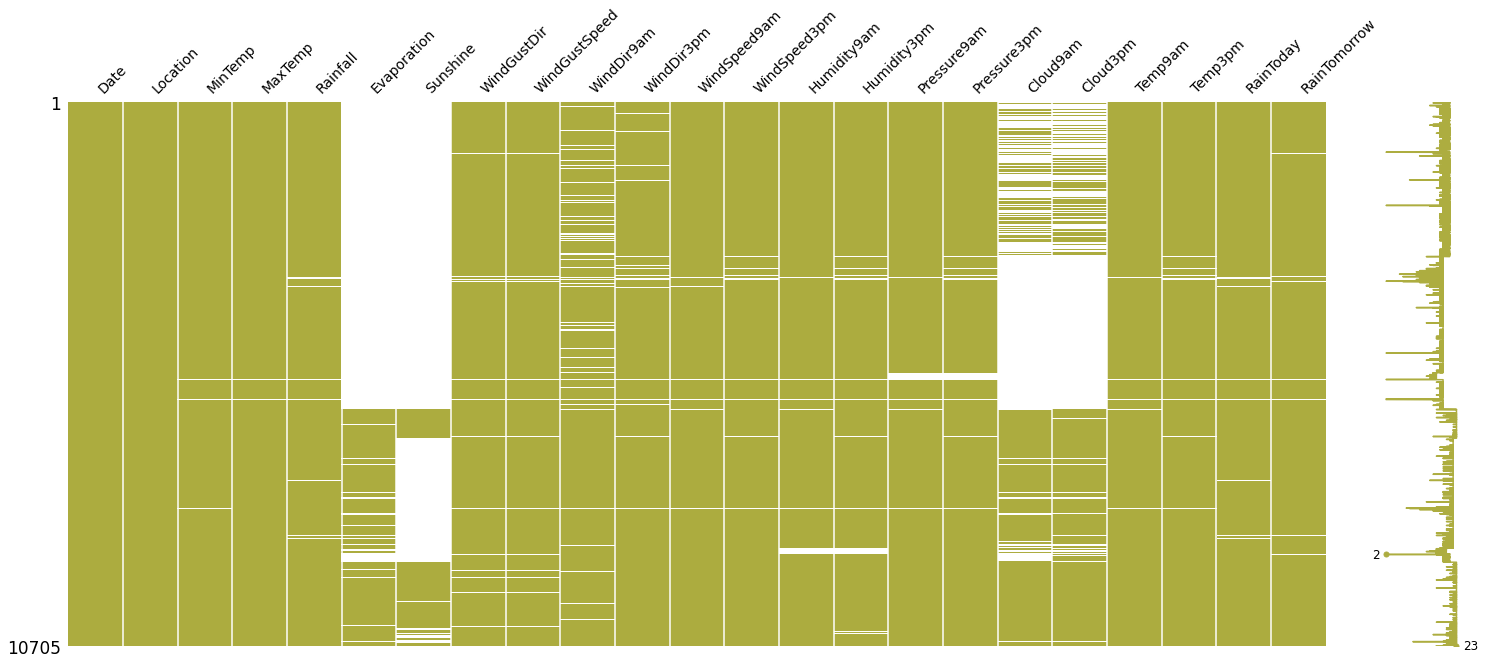

In [16]:
import missingno as msno 
msno.matrix(df, color= (0.678, 0.678, 0.250), fontsize=14)

In [17]:
data_cat = df[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
df.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [18]:
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(),inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(),inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(),inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(),inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(),inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(),inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(),inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(),inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(),inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(),inplace=True)

In [19]:
cat_names = data_cat.columns


In [20]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [21]:
data_cat = imp_mode.fit_transform(data_cat)


In [22]:
data_cat = pd.DataFrame(data_cat,columns=cat_names)


In [23]:
df = pd.concat([df,data_cat],axis=1)


In [24]:
df.corr()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.769664,0.119665,0.354080,0.319574,0.213842,-0.309269,-0.076108,-0.498578,-0.482363,0.908610,0.738178
MaxTemp,0.769664,1.000000,-0.077905,0.262796,0.094305,0.100722,-0.514550,-0.530601,-0.396397,-0.458436,0.886381,0.983849
Rainfall,0.119665,-0.077905,1.000000,0.120205,0.143585,0.087129,0.211776,0.266577,-0.114064,-0.074214,0.015211,-0.080900
WindGustSpeed,0.354080,0.262796,0.120205,1.000000,0.502074,0.673025,-0.305349,-0.109996,-0.504793,-0.479328,0.355323,0.219118
WindSpeed9am,0.319574,0.094305,0.143585,0.502074,1.000000,0.428527,-0.392568,-0.058747,-0.221417,-0.157974,0.273150,0.072650
WindSpeed3pm,0.213842,0.100722,0.087129,0.673025,0.428527,1.000000,-0.202603,-0.027416,-0.358739,-0.320555,0.229607,0.070686
Humidity9am,-0.309269,-0.514550,0.211776,-0.305349,-0.392568,-0.202603,1.000000,0.694692,0.210584,0.223959,-0.523625,-0.508572
Humidity3pm,-0.076108,-0.530601,0.266577,-0.109996,-0.058747,-0.027416,0.694692,1.000000,0.077223,0.132724,-0.276365,-0.579760
Pressure9am,-0.498578,-0.396397,-0.114064,-0.504793,-0.221417,-0.358739,0.210584,0.077223,1.000000,0.963728,-0.476130,-0.358490
Pressure3pm,-0.482363,-0.458436,-0.074214,-0.479328,-0.157974,-0.320555,0.223959,0.132724,0.963728,1.000000,-0.490347,-0.428821


In [25]:
cor = df.corr()


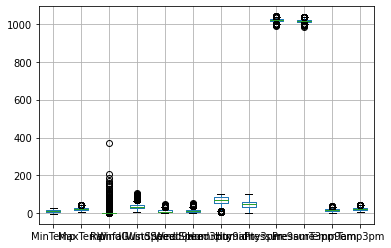

In [26]:
df.boxplot()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


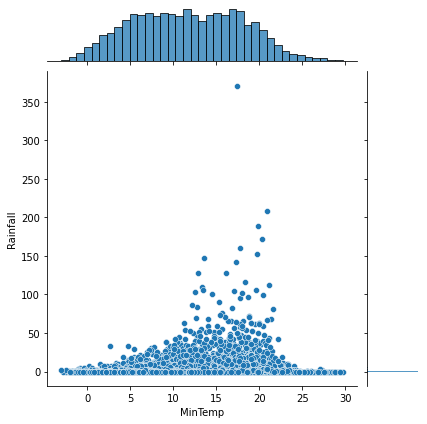

In [27]:
sns.jointplot(df["MinTemp"], df['Rainfall'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


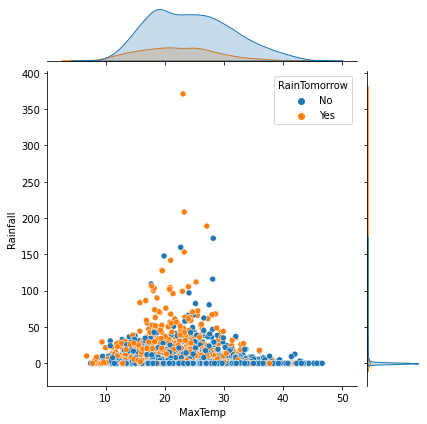

In [28]:
sns.jointplot(df["MaxTemp"], df['Rainfall'],hue=df["RainTomorrow"])


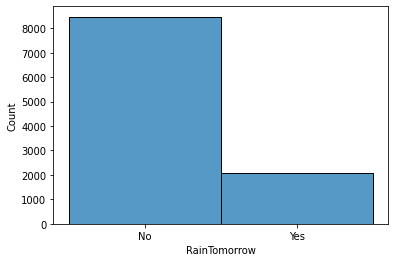

In [30]:
sns.histplot(df['RainTomorrow'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


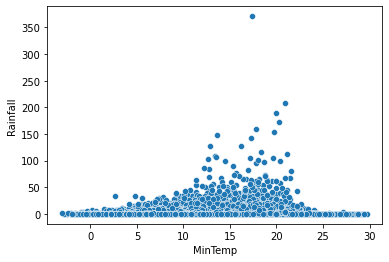

In [29]:
sns.scatterplot(df['MinTemp'],df['Rainfall'])


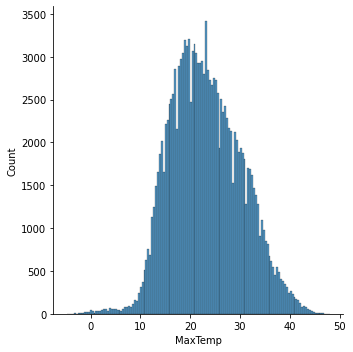

In [ ]:
sns.displot(df['MaxTemp'])


In [31]:
y=df['RainTomorrow']
x=df.drop('RainTomorrow',axis=1)


In [32]:
from sklearn.preprocessing import StandardScaler
y = df['RainTomorrow']
x = df.drop('RainTomorrow',axis=1)

In [33]:
n = x.columns
n

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [34]:
sc = StandardScaler()
x = pd.DataFrame(x,columns=n)


In [107]:
df.WindGustSpeed.replace(np.nan,df.WindGustSpeed.mean(),inplace=True)
df.WindSpeed9am.replace(np.nan,df.WindSpeed9am.mean(),inplace=True)
# Columns Include Categorial Data only
df.WindGustDir.replace(np.nan,"N/a",inplace=True)
df.WindDir9am.replace(np.nan,"N/a",inplace=True)
df.WindDir3pm.replace(np.nan,"N/a",inplace=True)
df.isna().sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
Albury           0
BadgerysCreek    0
Cobar            0
CoffsHarbour     0
No               0
Yes              0
No               0
Yes              0
dtype: int64

In [69]:
from sklearn import model_selection


In [70]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size =0.2,random_state =0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(8564, 18)
(8564,)
(2141, 18)
(2141,)


In [37]:
print(x_train)


             Date       Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  \
5386   2015-09-02  BadgerysCreek      2.5     18.7       0.0           20.0   
10646  2013-08-05   CoffsHarbour      4.7     20.2       0.0           30.0   
9291   2009-08-22   CoffsHarbour     16.2     24.1       0.0           43.0   
8645   2016-05-09          Cobar     16.5     21.2      43.0           52.0   
3018   2017-06-04         Albury     -0.9     14.5       0.0           17.0   
...           ...            ...      ...      ...       ...            ...   
9225   2009-06-17   CoffsHarbour      9.2     18.2       0.0           48.0   
4859   2014-03-24  BadgerysCreek     18.6     20.8       0.2           37.0   
3264   2009-08-13  BadgerysCreek      1.3     20.3       0.0           31.0   
9845   2011-02-27   CoffsHarbour     19.8     31.7       0.0           50.0   
2732   2016-08-22         Albury      8.4     13.9       0.2           31.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Hum

In [102]:
def SLRegression_and_eval(df,feature1,feature2):
    X=df[feature1].values
    Y=df[feature2].values
    x_mean=X.mean()
    y_mean=Y.mean()

    #Formula: ax+b=y
    #Calulating a and b values
    a=sum([(xi-x_mean)*(yi-y_mean) for xi,yi in zip(X,Y)])/sum([(xi-x_mean)**2 for xi in X])
    b=y_mean-(a*x_mean)

    #Getting the Y_pred
    Y_pred=lambda x: a*x+b
    
    #Plotting the Regression Line
    plt.scatter(X,Y,color="y");
    plt.plot([X.min(),X.max()],[Y_pred(X.min()),Y_pred(X.max())],color="purple")
    plt.scatter(x_mean,y_mean,color="blue",marker="s");
    
    RSS=sum([(yi-Y_pred(xi))**2 for xi,yi in zip(X,Y)])
    TSS=sum([(yi-y_mean)**2 for yi in Y])
    R2_score=1-(RSS/TSS)

    print("RSS{}\nTSS={}\nR2_score={}".format(RSS,TSS,R2_score))


RSS129719.35202335835
TSS=489855.6982597296
R2_score=0.7351886433408824


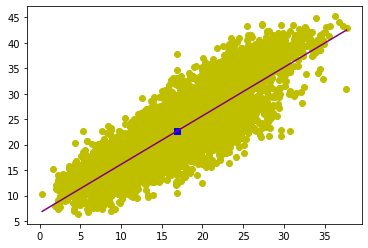

In [103]:
SLRegression_and_eval(df,"Temp9am","Temp3pm")


RSS33578.93151747014
TSS=471424.30355352414
R2_score=0.9287713186096743


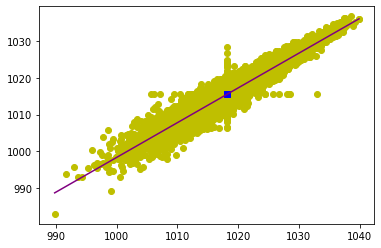

In [97]:
SLRegression_and_eval(df,"Pressure9am","Pressure3pm")


RSS212999.1979221307
TSS=522546.29753376235
R2_score=0.5923821507732172


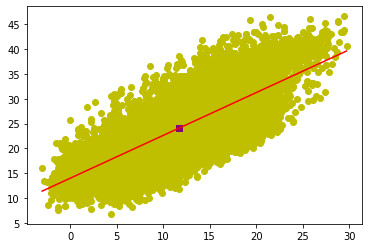

In [75]:
SLRegression_and_eval(df,"MinTemp","MaxTemp")



RSS16742.726931241952
TSS=522546.29753376235
R2_score=0.9679593425304861


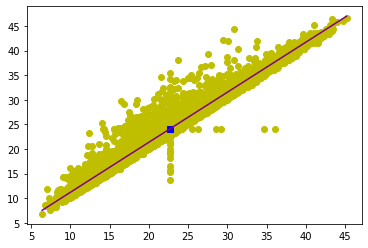

In [106]:
SLRegression_and_eval(df,"Temp3pm","MaxTemp")


RSS957226.5788729632
TSS=971260.5241257544
R2_score=0.014449207915068207


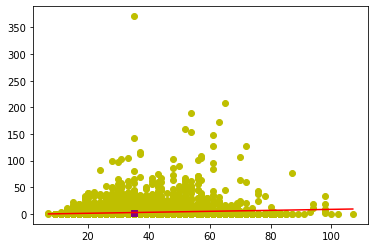

In [78]:
SLRegression_and_eval(df,"WindGustSpeed","Rainfall")
